# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
# Commenting this section as these libraries are already installed
'''
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm
!pip install plotly
!pip install gensim==4.3.2
'''

'\n!pip install --upgrade numpy==1.26.4\n!pip install --upgrade pandas==2.2.2\n!pip install --upgrade nltk==3.9.1\n!pip install --upgrade spacy==3.7.5\n!pip install --upgrade scipy==1.12\n!pip install --upgrade pydantic==2.10.5\n!pip install wordcloud==1.9.4\n!python -m spacy download en_core_web_sm\n!pip install plotly\n!pip install gensim==4.3.2\n'

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

# nltk imports and downloads for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
# Download necessary NLTK resources quietly to avoid displaying output
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)  # Correct resource name for POS tagging

# Importing WordCloud for visualizing word frequencies
from wordcloud import WordCloud

# Importing gensim for word embeddings and natural language processing
import gensim.downloader as api
from gensim.models import KeyedVectors

# Importing train_test_split for splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Importing tqdm for progress bars in loops
from tqdm import tqdm

In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
df_true = pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fake = pd.read_csv('Fake.csv')

# Display the shape of both datasets
print("True News Dataset Shape:", df_true.shape)
print("Fake News Dataset Shape:", df_fake.shape)

True News Dataset Shape: (21417, 3)
Fake News Dataset Shape: (23523, 3)


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data

# Display the first 5 rows of the True News dataset
print("Sample records from the True News dataset:")
display(df_true.head())

# Display basic information about the dataset (columns, data types, non-null counts)
print("\nDataset Info:")
df_true.info()

# Check for missing values in each column
print("\nMissing Values:")
print(df_true.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df_true.duplicated().sum())

# Summary statistics for any numeric columns (mostly useful for date if needed)
print("\nSummary Statistics:")
print(df_true.describe(include='all'))

Sample records from the True News dataset:


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB

Missing Values:
title    0
text     0
date     0
dtype: int64

Number of Duplicate Rows: 217

Summary Statistics:
                                                       title  \
count                                                  21417   
unique                                                 20826   
top     Factbox: Trump fills top jobs for his administration   
freq                                                      14   

                                                                                                                                                                                                                           

In [6]:
# Inspect the DataFrame with Fake News to understand the given data

# Display the first 5 rows of the Fake News dataset
print("Sample records from the Fake News dataset:")
display(df_fake.head())

# Display basic information about the dataset (columns, data types, non-null counts)
print("\nDataset Info:")
df_fake.info()

# Check for missing values in each column
print("\nMissing Values:")
print(df_fake.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df_fake.duplicated().sum())

# Summary statistics for any numeric columns (mostly useful for date if needed)
print("\nSummary Statistics:")
print(df_fake.describe(include='all'))

Sample records from the Fake News dataset:


,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB

Missing Values:
title    21
text     21
date     42
dtype: int64

Number of Duplicate Rows: 5601

Summary Statistics:
                                                                                                        title  \
count                                                                                                   23502   
unique                                                                                                  17914   
top     MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead   
freq                                                                                

In [7]:
# Print the column details for True News DataFrame
print("Columns in the True News DataFrame:")
print(df_true.columns.tolist())

# Print data types of each column
print("\nColumn Data Types:")
print(df_true.dtypes)

Columns in the True News DataFrame:
['title', 'text', 'date']

Column Data Types:
title    object
text     object
date     object
dtype: object


In [8]:
# Print the column details for Fake News Dataframe
print("Columns in the Fake News DataFrame:")
print(df_fake.columns.tolist())

# Print data types of each column
print("\nColumn Data Types:")
print(df_fake.dtypes)

Columns in the Fake News DataFrame:
['title', 'text', 'date']

Column Data Types:
title    object
text     object
date     object
dtype: object


In [9]:
# Print the column names of both DataFrames

# Column names of True News DataFrame
print("Columns in True News DataFrame:")
print(df_true.columns.tolist())

# Column names of Fake News DataFrame
print("\nColumns in Fake News DataFrame:")
print(df_fake.columns.tolist())

Columns in True News DataFrame:
['title', 'text', 'date']

Columns in Fake News DataFrame:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

# Add a new column 'news_label' to the true new Dataframe
df_true['news_label'] = 1

# Confirm the change by displaying the updated DataFrame's first few rows
print("Updated True News DataFrame with 'news_label':")
display(df_true.head())

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

# Add a new column 'news_label' to the false new Dataframe
df_fake['news_label'] = 0

# Confirm the change by displaying the updated DataFrame's first few rows
print("Updated Fake News DataFrame with 'news_label':")
display(df_fake.head())

Updated True News DataFrame with 'news_label':


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

Updated Fake News DataFrame with 'news_label':


,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
df_news = pd.concat([df_true, df_fake], axis=0).reset_index(drop=True)

In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("Combined News Dataset Shape:", df_news.shape)
display(df_news.head())

Combined News Dataset Shape: (44940, 4)


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
print("Null Values in Each Column:")
print(df_news.isnull().sum())

Null Values in Each Column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [14]:
# Handle Rows with Null Values

# Remove rows with any null values from the combined dataset
df_news.dropna(inplace=True)

# Confirm that all null values have been removed
print("Null Values After Dropping:")
print(df_news.isnull().sum())

# Updated shape of the DataFrame
print("\nShape After Removing Nulls:", df_news.shape)

Null Values After Dropping:
title         0
text          0
date          0
news_label    0
dtype: int64

Shape After Removing Nulls: (44898, 4)


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [15]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

# Combine 'title' and 'text' columns into a single 'news_text' column
df_news['news_text'] = df_news['title'] + ' ' + df_news['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed

# Drop the now-unnecessary columns: 'title', 'text', and 'date'
df_news.drop(columns=['title', 'text', 'date'], inplace=True)

# Display the first 5 rows of the updated DataFrame to check the result
print("Updated DataFrame with 'news_text' and 'news_label':")
display(df_news.head())

Updated DataFrame with 'news_text' and 'news_label':


news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [16]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
df_clean['cleaned_text'] = ''        # To store cleaned text
df_clean['lemmatized_text'] = ''     # To store lemmatized text without POS tags

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df_news['news_label'].values

# Check structure
display(df_clean.head())

,cleaned_text,lemmatized_text,news_label
0,NaN,NaN,1
1,NaN,NaN,1
2,NaN,NaN,1
3,NaN,NaN,1
4,NaN,NaN,1


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [17]:
# Write the function here to clean the text and remove all the unnecessary elements

# Function to clean the text
def clean_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words with numbers
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [18]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

# Apply the cleaning function to the combined news text
df_clean['cleaned_text'] = df_news['news_text'].apply(clean_text)

# Display a few cleaned examples
print("Sample cleaned news text:")
display(df_clean[['cleaned_text']].head())

Sample cleaned news text:


cleaned_text
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending  by about  percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i don’t see where the rationale is  eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least  fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in  in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in september

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [19]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to lemmatize and retain only NN and NNS tokens
def lemmatize_nouns(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    
    # Keep only nouns (NN, NNS) and remove stopwords
    filtered_tokens = [
        lemmatizer.lemmatize(word)
        for word, tag in tagged_tokens
        if tag in ['NN', 'NNS'] and word not in stop_words
    ]
    
    return ' '.join(filtered_tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [20]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

tqdm.pandas()  # Enable tqdm for pandas


# Set a custom label for the progress bar
tqdm.pandas(desc="Lemmatizing cleaned text")

# Ensure all values in 'cleaned_text' are strings before applying the lemmatization function
df_clean['cleaned_text'] = df_clean['cleaned_text'].astype(str)

# Apply the lemmatization function with a labeled progress bar
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(lemmatize_nouns)

# Display a few examples of lemmatized text
print("\nSample lemmatized news text:")
display(df_clean[['lemmatized_text']].head())

Lemmatizing cleaned text: 100%|██████████| 44898/44898 [05:19<00:00, 140.49it/s]


Sample lemmatized news text:


,lemmatized_text
0,budget fight republican script washington head faction congress month expansion debt tax cut ” sunday budget restraint pivot way mark meadow cbs ’ nation line spending lawmaker battle holiday lawmaker budget fight issue immigration policy election campaign approach control congress president donald trump republican budget increase spending democrat increase ” spending program education research infrastructure health protection trump administration spending percent ’ chairman house freedom caucus program “ government pay raise see rationale people money ” meadow december party ’ tax overhaul budget deficit year debt mark talk responsibility joseph crowley cbs crowley tax bill state generation tax cut corporation “ bill history house representative year crowley republican tax package tax overhaul year economy job growth house speaker paul ryan tax bill meadow radio interview welfare reform ” party republican priority parlance entitlement ” program food stamp housing assistance medicare medicaid health insurance program washington democrat december remark republican tax overhaul spending cut program goal house republican seat senate vote democrat budget government shutdown democrat leverage senate control nondefense program spending issue “ dreamer people country child march expiration date action childhood arrival daca program immigrant deportation work president twitter message border wall immigration law change exchange dreamer debbie dingell cbs issue policy objective wall funding trump aide leader issue weekend strategy session trump leader jan house trump sunday governor rick scott emergency house aid package hurricane florida texas puerto rico wildfire california package trump administration senate aid
1,transgender recruit monday washington reuters people time monday court pentagon friday president donald trump administration ruling transgender ban appeal court washington virginia week administration request hold order court judge military transgender recruit jan justice department official administration ruling department defense study issue week appeal administration dod study president authority district court meantime official condition anonymity pentagon panel official trump individual defense department plan lawyer transgender service member recruit administration ruling conservativemajority court pentagon spokeswoman heather babb statement “ court order department defense transgender applicant service jan applicant accession standard jennifer lawyer advocacy group glad decision news government way ban military country levi glad liberty union represent plaintiff lawsuit administration move hardline supporter july people reversing president barack obama policy trump twitter time “ cost disruption transgender military judge baltimore washington dc seattle california ruling trump ban challenge president policy judge ban right constitution protection law pentagon dec guideline personnel order transgender applicant jan memo requirement applicant sex trump administration paper force thousand personnel standard transgender applicant individual service administration deadline july transgender recruit defense secretary james date president ban trump step transgender right administration law workplace discrimination employee obamaera position trump guidance administration school transgender student restroom gender identity
2,senator job washington counsel investigation link russia president trump election campaign interference call administration ally lawmaker senator sunday lindsey graham senate force committee department justice counsel robert mueller russia investigation interference “ investigation investigation influence graham cbs ’ nation news program “ job guy time question russia election campaign effort house trump office january sign trump prepares year power rhetoric trump ally week mueller team bias president trump supporter interview week york time mueller russia role election question link tr

### Save the Cleaned data as a csv file (Recommended)

In [21]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)

df_clean = pd.read_csv("clean_df.csv")

In [22]:
# Check the first few rows of the DataFrame
print("Final Cleaned DataFrame:")
display(df_clean.head())

Final Cleaned DataFrame:


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending  by about  percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i don’t see where the rationale is  eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least  fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in  in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in septem

Shape of the Cleaned DataFrame: (44898, 3)
Distribution of News Labels:
news_label
0    23481
1    21417
Name: count, dtype: int64


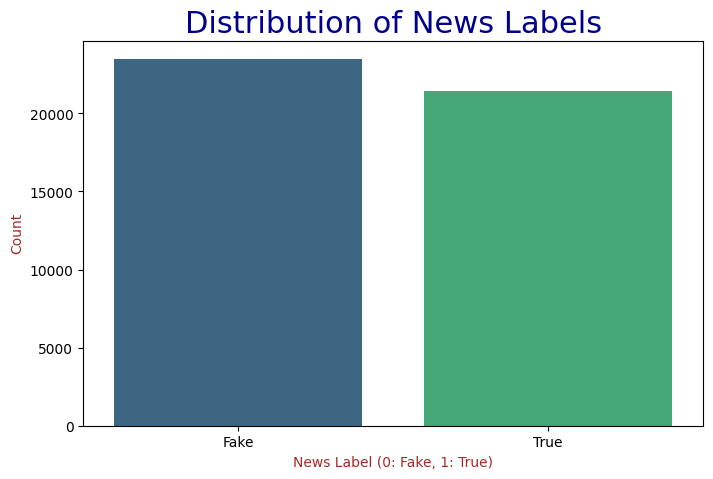

Final Cleaned DataFrame:


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending  by about  percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i don’t see where the rationale is  eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least  fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in  in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in septem

In [23]:
# Check the dimensions of the DataFrame
print("Shape of the Cleaned DataFrame:", df_clean.shape)
# Check the distribution of news labels
print("Distribution of News Labels:")
print(df_clean['news_label'].value_counts())
# Visualize the distribution of news labels using a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='news_label', data=df_clean, palette='viridis')
plt.title('Distribution of News Labels', color='darkblue', fontsize=22)
plt.xlabel('News Label (0: Fake, 1: True)', color='brown')
plt.ylabel('Count', color='brown')
plt.xticks(ticks=[0, 1], labels=['Fake', 'True'])
plt.show()
# Check the first few rows of the DataFrame
print("Final Cleaned DataFrame:")
display(df_clean.head())


In [24]:
# Check the number of non-null entries and data types of each column
print("Data Types and Non-Null Counts:")
print(df_clean.info())
# Check for any missing values in the DataFrame
print("Missing Values in Each Column:")
print(df_clean.isnull().sum())
# Check for duplicate rows in the DataFrame
print("Number of Duplicate Rows:", df_clean.duplicated().sum())
# Check the first few rows of the DataFrame
print("First Few Rows of the DataFrame:")
display(df_clean.head())
# Check the distribution of news labels in the DataFrame
print("Distribution of News Labels:")
print(df_clean['news_label'].value_counts())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_text     44856 non-null  object
 1   lemmatized_text  44847 non-null  object
 2   news_label       44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None
Missing Values in Each Column:
cleaned_text       42
lemmatized_text    51
news_label          0
dtype: int64
Number of Duplicate Rows: 5796
First Few Rows of the DataFrame:


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending  by about  percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i don’t see where the rationale is  eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least  fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in  in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in septem

Distribution of News Labels:
news_label
0    23481
1    21417
Name: count, dtype: int64


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [25]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

# Split the DataFrame into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(
    df_clean['lemmatized_text'], 
    df_clean['news_label'], 
    test_size=0.3, 
    random_state=42
)
# Display the shapes of the training and validation sets
print("Training Set Shape:", X_train.shape, "Validation Set Shape:", X_val.shape)
# Display the first few rows of the training set
print("First Few Rows of the Training Set:")
display(X_train.head())
# Display the first few rows of the validation set
print("First Few Rows of the Validation Set:")
display(X_val.head())


Training Set Shape: (31428,) Validation Set Shape: (13470,)
First Few Rows of the Training Set:


13970                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         pm party government deal opposition submit

First Few Rows of the Validation Set:


22216                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [26]:
# Add a new column to calculate the character length of cleaned news text - this needs to be done on validation set as well

df_clean['cleaned_text_length'] = df_clean['cleaned_text'].apply(lambda x: len(str(x)))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(lambda x: len(str(x)))
# Display the first few rows of the DataFrame with the new columns
print("DataFrame with Text Length Columns:")
display(df_clean[['cleaned_text', 'cleaned_text_length', 'lemmatized_text', 'lemmatized_text_length']].head())


DataFrame with Text Length Columns:


cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a “fiscal conservative” on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs’ “face the nation” drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense “discretionary” spending on programs that support education scientific research infrastructure public health and environmental protection “the trump administration has already been willing to say ‘we’re going to increase nondefense discretionary spending  by about  percent’” meadows chairman of the small but influential house freedom caucus said on the program “now democrats are saying that’s not enough we need to give the government a pay raise of  to  percent for a fiscal conservative i don’t see where the rationale is  eventually you run out of other people’s money” he said meadows was among republicans who voted in late december for their party’s debtfinanced tax overhaul which is expected to balloon the federal budget deficit and add about  trillion over  years to the  trillion national debt “it’s interesting to hear mark talk about fiscal responsibility” democratic us representative joseph crowley said on cbs crowley said the republican tax bill would require the  united states to borrow  trillion to be paid off by future generations to finance tax cuts for corporations and the rich “this is one of the least  fiscally responsible bills we’ve ever seen passed in the history of the house of representatives i think we’re going to be paying for this for many many years to come” crowley said republicans insist the tax package the biggest us tax overhaul in more than  years  will boost the economy and job growth house speaker paul ryan who also supported the tax bill recently went further than meadows making clear in a radio interview that welfare or “entitlement reform” as the party often calls it would be a top republican priority in  in republican parlance “entitlement” programs mean food stamps housing assistance medicare and medicaid health insurance for the elderly poor and disabled as well as other programs created by washington to assist the needy democrats seized on ryan’s early december remarks saying they showed republicans would try to pay for their tax overhaul by seeking spending cuts for social programs but the goals of house republicans may have to take a back seat to the senate where the votes of some democrats will be needed to approve a budget and prevent a government shutdown democrats will use their leverage in the senate which republicans narrowly control to defend both discretionary nondefense programs and social spending while tackling the issue of the “dreamers” people brought illegally to the country as children trump in septem

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

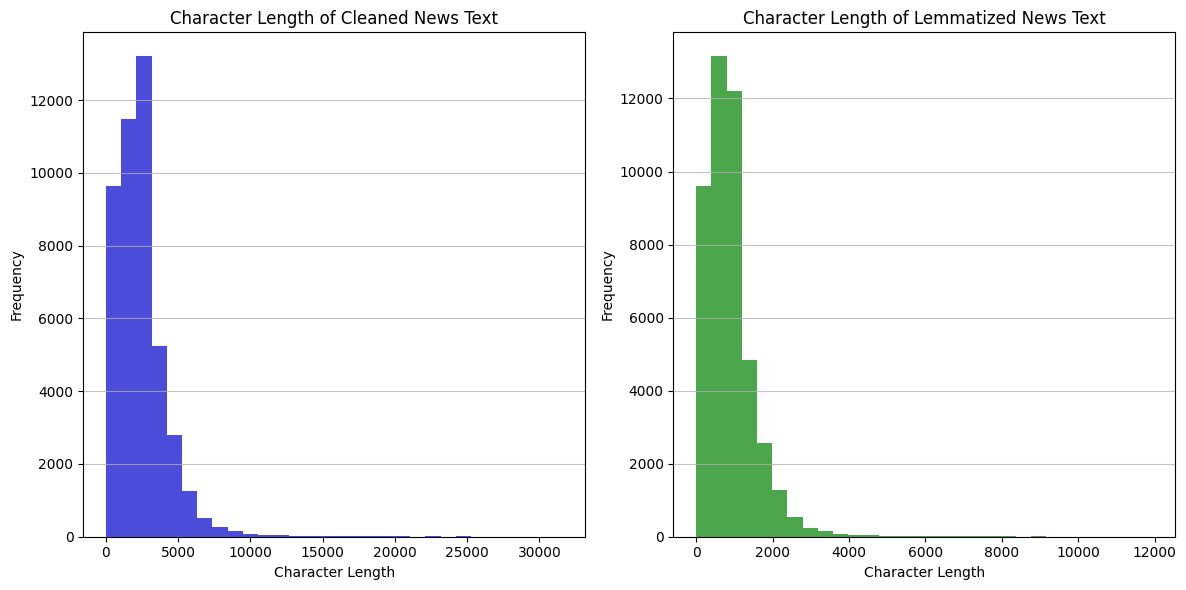

In [27]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
plt.hist(df_clean['cleaned_text_length'], bins=30, color='mediumblue', alpha=0.7)
plt.title('Character Length of Cleaned News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) 

# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
plt.hist(df_clean['lemmatized_text_length'], bins=30, color='green', alpha=0.7)
plt.title('Character Length of Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

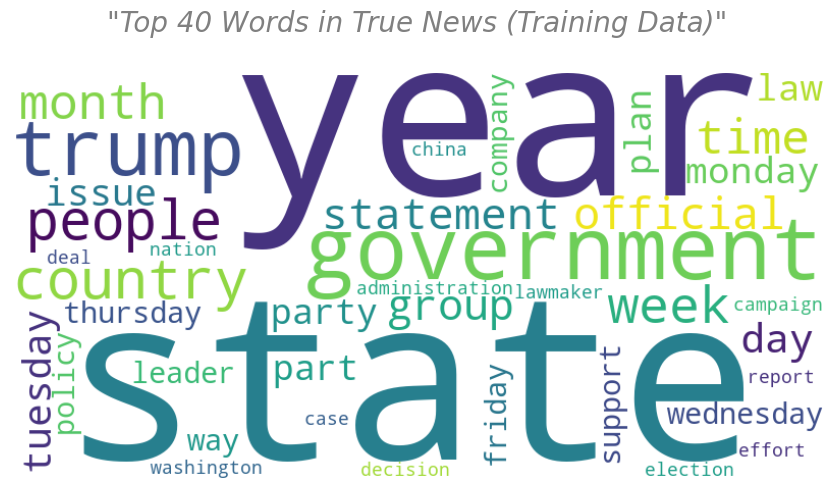

In [28]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News

# Filter the training data for True News
true_news_text = ' '.join(X_train[y_train == 1].astype(str).tolist())
# Create a WordCloud object for True News
wordcloud_true = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(true_news_text)
# Display the word cloud for True News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('"Top 40 Words in True News (Training Data)"\n', color='grey', fontstyle='italic', fontsize=20)
plt.tight_layout()
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

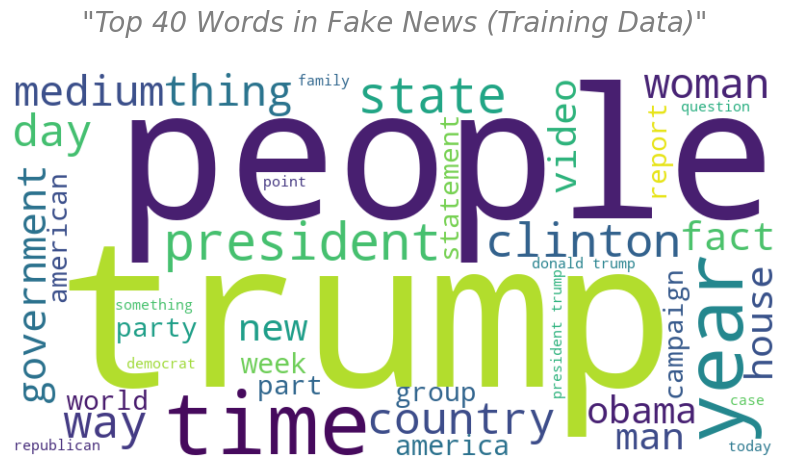

In [29]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
# Filter the training data for Fake News
fake_news_text = ' '.join(X_train[y_train == 0].astype(str).tolist())
# Create a WordCloud object for Fake News
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', max_words=40).generate(fake_news_text)
# Plot the word cloud for Fake News
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('"Top 40 Words in Fake News (Training Data)"\n', color='grey', fontstyle='italic', fontsize=20)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [30]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text_series, n=1, top_n=10):
    """
    Get the top n-grams from a series of text data.
    
    Parameters:
    - text_series: pd.Series containing text data
    - n: int, the size of the n-grams (1 for unigrams, 2 for bigrams, etc.)
    - top_n: int, number of top n-grams to return
    
    Returns:
    - List of tuples containing the n-grams and their frequencies
    """
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(text_series)
    ngram_counts = np.asarray(X.sum(axis=0)).flatten()
    ngram_features = vectorizer.get_feature_names_out()
    
    # Create a DataFrame for n-grams and their counts
    ngram_df = pd.DataFrame({'ngram': ngram_features, 'count': ngram_counts})
    
    # Sort by count and get the top n-grams
    top_ngrams = ngram_df.sort_values(by='count', ascending=False).head(top_n)
    
    return list(zip(top_ngrams['ngram'], top_ngrams['count']))


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [31]:
# Handle NaN values in the text data
X_train = X_train.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
[('trump', 32684),
 ('state', 25500),
 ('president', 19190),
 ('reuters', 16536),
 ('government', 13865),
 ('year', 13189),
 ('house', 12700),
 ('party', 10795),
 ('people', 10785),
 ('election', 10121)]


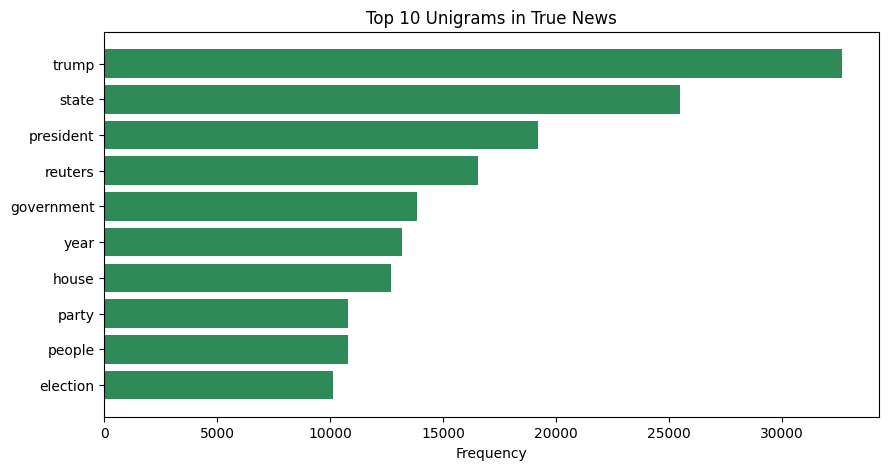

In [32]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams_true = get_top_ngrams(X_train[y_train == 1], n=1, top_n=10)
print("Top 10 Unigrams in True News:")
pprint(top_unigrams_true)
# Plot the top 10 unigrams for True News
unigrams_true, counts_true = zip(*top_unigrams_true)
plt.figure(figsize=(10, 5))
plt.barh(unigrams_true, counts_true, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
[('donald trump', 2004),
 ('barack obama', 1985),
 ('president barack', 1945),
 ('washington reuters', 1932),
 ('president trump', 1862),
 ('reuters president', 1858),
 ('president donald', 1731),
 ('secretary state', 1607),
 ('house representative', 1592),
 ('state department', 1348)]


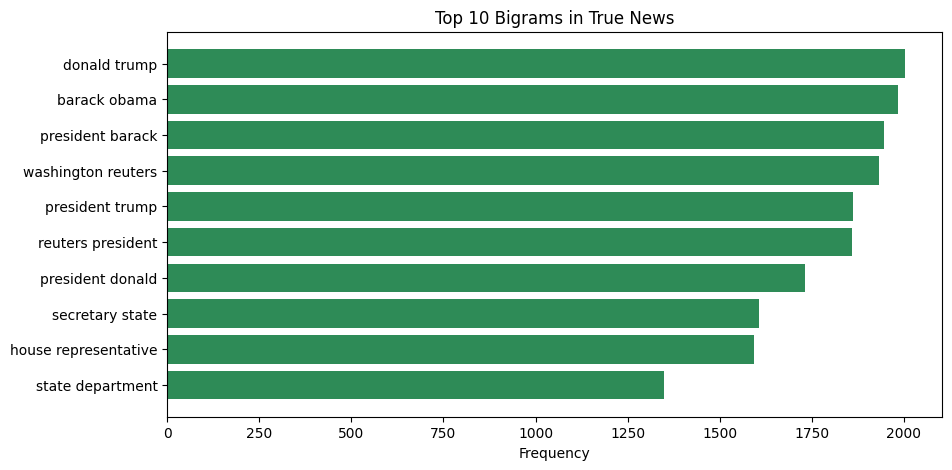

In [33]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true = get_top_ngrams(X_train[y_train == 1], n=2, top_n=10)
print("Top 10 Bigrams in True News:")
pprint(top_bigrams_true)
# Plot the top 10 bigrams for True News
bigrams_true, counts_true = zip(*top_bigrams_true)
plt.figure(figsize=(10, 5))
plt.barh(bigrams_true, counts_true, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
[('president barack obama', 1748),
 ('president donald trump', 774),
 ('washington reuters president', 565),
 ('reuters president trump', 556),
 ('secretary state rex', 464),
 ('president vladimir putin', 457),
 ('state rex tillerson', 452),
 ('speaker paul ryan', 374),
 ('leader mitch mcconnell', 344),
 ('chancellor angela merkel', 335)]


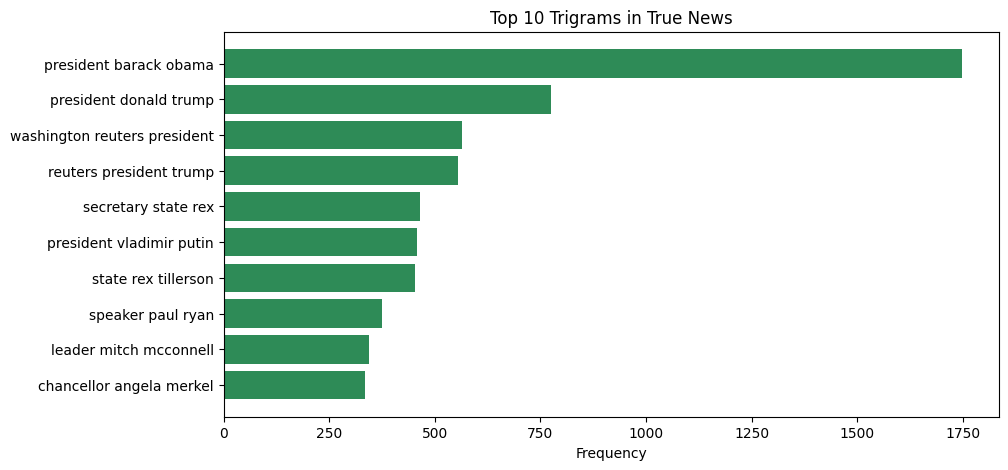

In [34]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true = get_top_ngrams(X_train[y_train == 1], n=3, top_n=10)
print("Top 10 Trigrams in True News:")
pprint(top_trigrams_true)
# Plot the top 10 trigrams for True News
trigrams_true, counts_true = zip(*top_trigrams_true)
plt.figure(figsize=(10, 5))
plt.barh(trigrams_true, counts_true, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
[('trump', 47280),
 ('president', 18584),
 ('people', 18402),
 ('state', 14724),
 ('clinton', 12779),
 ('time', 12278),
 ('year', 10373),
 ('news', 10180),
 ('image', 9957),
 ('obama', 8728)]


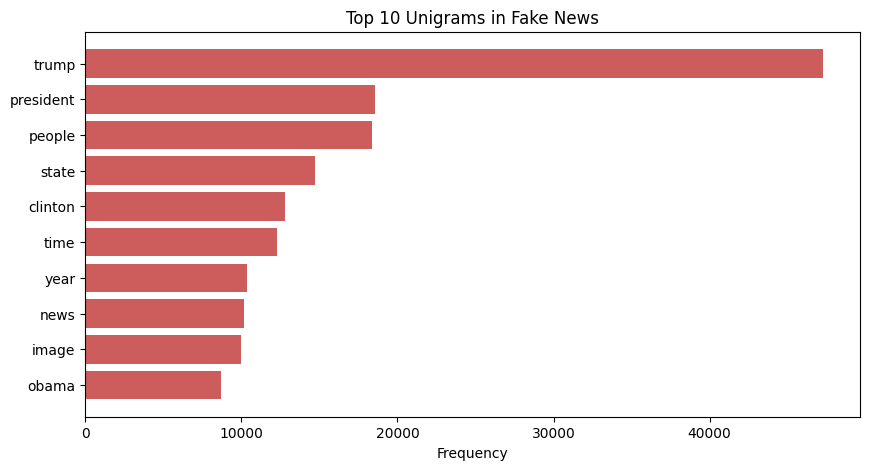

In [35]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_unigrams_fake = get_top_ngrams(X_train[y_train == 0], n=1, top_n=10)
print("Top 10 Unigrams in Fake News:")
pprint(top_unigrams_fake)
# Plot the top 10 unigrams for Fake News
unigrams_fake, counts_fake = zip(*top_unigrams_fake)
plt.figure(figsize=(10, 5))
plt.barh(unigrams_fake, counts_fake, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
[('donald trump', 3693),
 ('president trump', 2838),
 ('president obama', 1827),
 ('trump campaign', 1434),
 ('trump supporter', 1332),
 ('century wire', 1273),
 ('barack obama', 1251),
 ('trump realdonaldtrump', 1172),
 ('law enforcement', 1083),
 ('secretary state', 1075)]


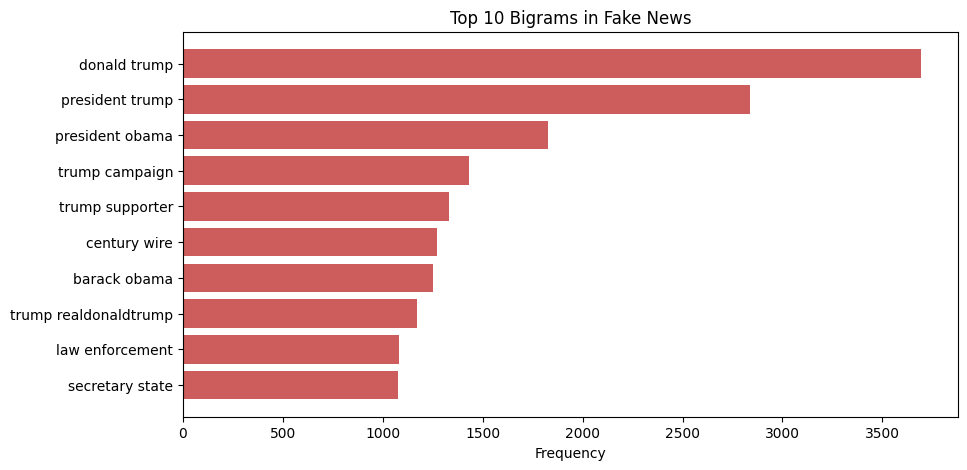

In [36]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake = get_top_ngrams(X_train[y_train == 0], n=2, top_n=10)
print("Top 10 Bigrams in Fake News:")
pprint(top_bigrams_fake)
# Plot the top 10 bigrams for Fake News
bigrams_fake, counts_fake = zip(*top_bigrams_fake)
plt.figure(figsize=(10, 5))
plt.barh(bigrams_fake, counts_fake, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
[('news century wire', 632),
 ('donald trump realdonaldtrump', 558),
 ('president barack obama', 527),
 ('image video screen', 403),
 ('video screen capture', 377),
 ('president donald trump', 220),
 ('department homeland security', 211),
 ('secretary state clinton', 179),
 ('image chip image', 172),
 ('house press secretary', 168)]


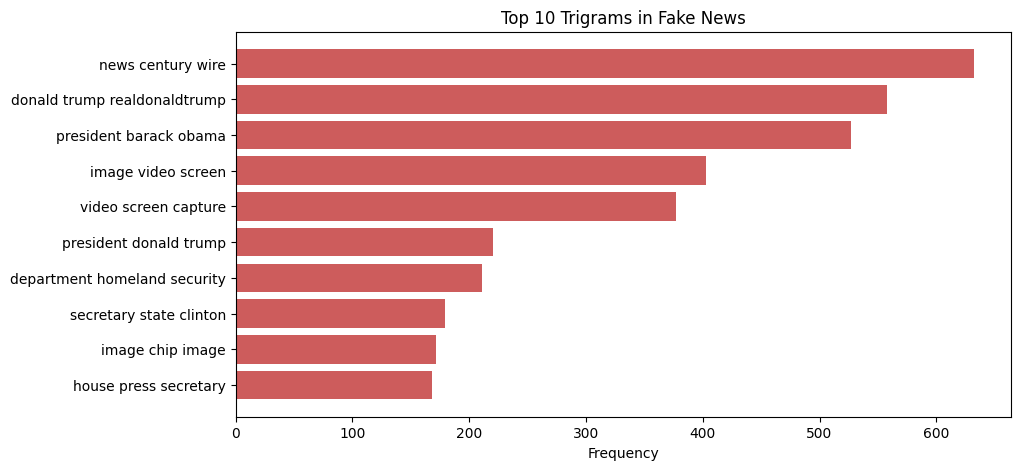

In [37]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake = get_top_ngrams(X_train[y_train == 0], n=3, top_n=10)
print("Top 10 Trigrams in Fake News:")
pprint(top_trigrams_fake)
# Plot the top 10 trigrams for Fake News
trigrams_fake, counts_fake = zip(*top_trigrams_fake)
plt.figure(figsize=(10, 5))
plt.barh(trigrams_fake, counts_fake, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [38]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [39]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [40]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text


# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [41]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [42]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [43]:
## First handle NaN values in the text data

X_val = X_val.fillna('')

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News (Validation Set):
[('trump', 14671),
 ('state', 10961),
 ('president', 8302),
 ('reuters', 7243),
 ('government', 6014),
 ('year', 5778),
 ('house', 5681),
 ('people', 4648),
 ('party', 4599),
 ('election', 4415)]


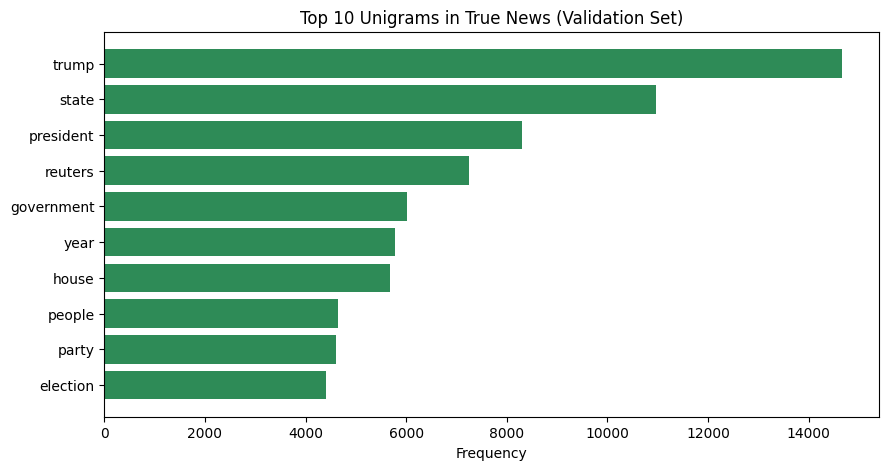

In [44]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
top_unigrams_true_val = get_top_ngrams(X_val[y_val == 1], n=1, top_n=10)
print("Top 10 Unigrams in True News (Validation Set):")
pprint(top_unigrams_true_val)
# Plot the top 10 unigrams for True News (Validation Set)
unigrams_true_val, counts_true_val = zip(*top_unigrams_true_val)
plt.figure(figsize=(10, 5))
plt.barh(unigrams_true_val, counts_true_val, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in True News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News (Validation Set):
[('donald trump', 946),
 ('barack obama', 877),
 ('president barack', 851),
 ('washington reuters', 842),
 ('president donald', 810),
 ('president trump', 804),
 ('reuters president', 780),
 ('secretary state', 742),
 ('trump campaign', 691),
 ('house representative', 684)]


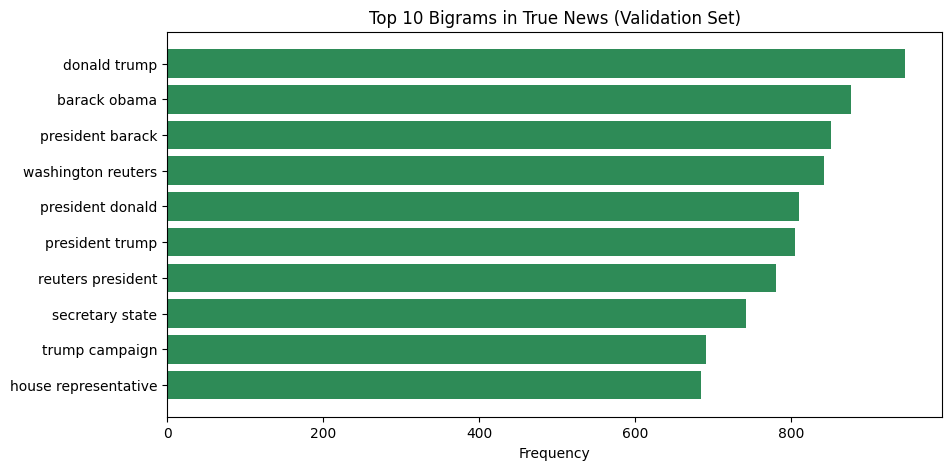

In [45]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_bigrams_true_val = get_top_ngrams(X_val[y_val == 1], n=2, top_n=10)
print("Top 10 Bigrams in True News (Validation Set):")
pprint(top_bigrams_true_val)
# Plot the top 10 bigrams for True News (Validation Set)
bigrams_true_val, counts_true_val = zip(*top_bigrams_true_val)
plt.figure(figsize=(10, 5))
plt.barh(bigrams_true_val, counts_true_val, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in True News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News (Validation Set):
[('president barack obama', 771),
 ('president donald trump', 367),
 ('washington reuters president', 239),
 ('reuters president trump', 230),
 ('president vladimir putin', 215),
 ('secretary state rex', 208),
 ('state rex tillerson', 196),
 ('speaker paul ryan', 157),
 ('leader mitch mcconnell', 154),
 ('majority leader mitch', 139)]


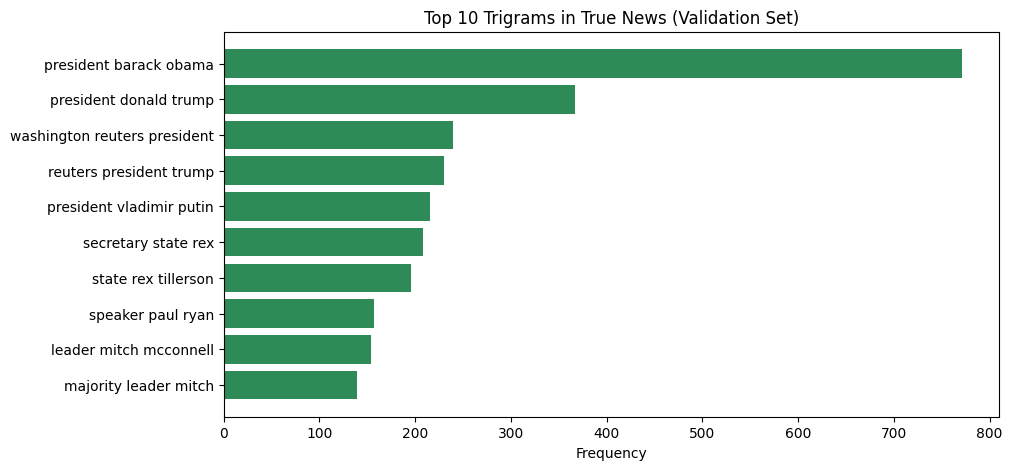

In [46]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_trigrams_true_val = get_top_ngrams(X_val[y_val == 1], n=3, top_n=10)
print("Top 10 Trigrams in True News (Validation Set):")
pprint(top_trigrams_true_val)
# Plot the top 10 trigrams for True News (Validation Set)
trigrams_true_val, counts_true_val = zip(*top_trigrams_true_val)
plt.figure(figsize=(10, 5))
plt.barh(trigrams_true_val, counts_true_val, color='#2E8B57')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in True News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News (Validation Set):
[('trump', 19910),
 ('president', 8399),
 ('people', 7938),
 ('state', 6632),
 ('time', 5418),
 ('clinton', 5408),
 ('year', 4473),
 ('news', 4442),
 ('image', 4066),
 ('obama', 3677)]


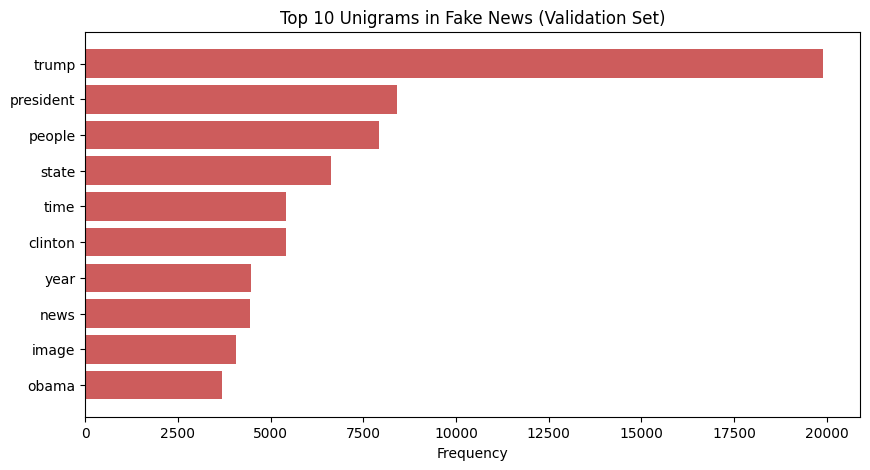

In [47]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph - Only in validation set

top_unigrams_fake_val = get_top_ngrams(X_val[y_val == 0], n=1, top_n=10)
print("Top 10 Unigrams in Fake News (Validation Set):")
pprint(top_unigrams_fake_val)

# Plot the top 10 unigrams for Fake News (Validation Set)
unigrams_fake_val, counts_fake_val = zip(*top_unigrams_fake_val)
plt.figure(figsize=(10, 5))
plt.barh(unigrams_fake_val, counts_fake_val, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Unigrams in Fake News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News (Validation Set):
[('donald trump', 1565),
 ('president trump', 1320),
 ('president obama', 791),
 ('trump campaign', 589),
 ('century wire', 554),
 ('trump supporter', 552),
 ('barack obama', 515),
 ('state department', 508),
 ('secretary state', 497),
 ('police officer', 495)]


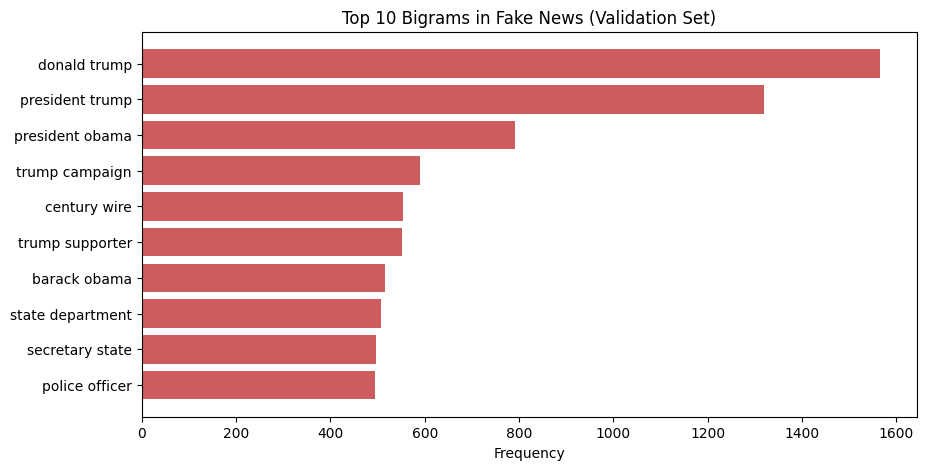

In [48]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_bigrams_fake_val = get_top_ngrams(X_val[y_val == 0], n=2, top_n=10)
print("Top 10 Bigrams in Fake News (Validation Set):")
pprint(top_bigrams_fake_val)
# Plot the top 10 bigrams for Fake News (Validation Set)
bigrams_fake_val, counts_fake_val = zip(*top_bigrams_fake_val)
plt.figure(figsize=(10, 5))
plt.barh(bigrams_fake_val, counts_fake_val, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams in Fake News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News (Validation Set):
[('news century wire', 272),
 ('president barack obama', 214),
 ('image video screen', 195),
 ('video screen capture', 186),
 ('donald trump realdonaldtrump', 180),
 ('president donald trump', 102),
 ('image chip image', 84),
 ('department homeland security', 83),
 ('secretary state clinton', 82),
 ('fbi director james', 80)]


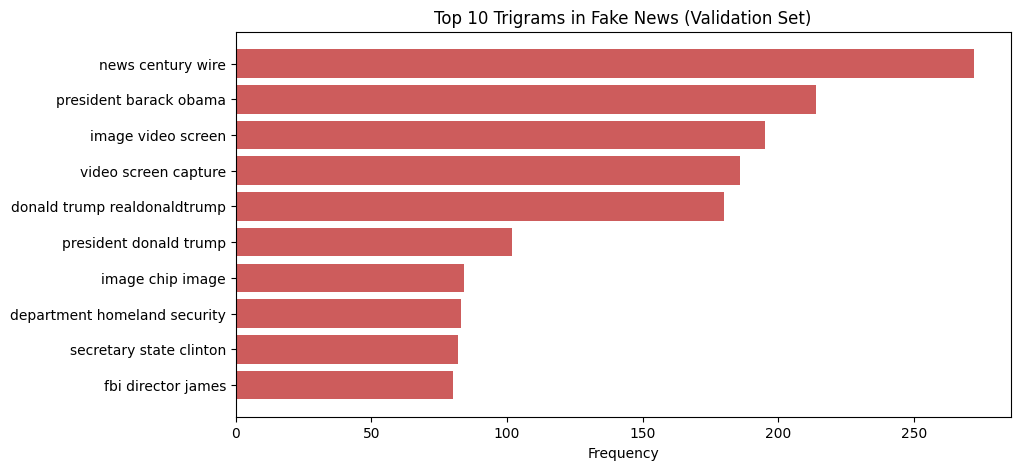

In [49]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_trigrams_fake_val = get_top_ngrams(X_val[y_val == 0], n=3, top_n=10)
print("Top 10 Trigrams in Fake News (Validation Set):")
pprint(top_trigrams_fake_val)
# Plot the top 10 trigrams for Fake News (Validation Set)
trigrams_fake_val, counts_fake_val = zip(*top_trigrams_fake_val)
plt.figure(figsize=(10, 5))
plt.barh(trigrams_fake_val, counts_fake_val, color='#CD5C5C')
plt.xlabel('Frequency')
plt.title('Top 10 Trigrams in Fake News (Validation Set)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [50]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

# Download and load the pre-trained Word2Vec model
model = api.load("word2vec-google-news-300")

# Check if the model is loaded correctly
print("Word2Vec Model Loaded. Vocabulary Size:", len(model.key_to_index))

Word2Vec Model Loaded. Vocabulary Size: 3000000


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [51]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def get_average_word2vec(texts, model):
    vectors = []
    for text in texts:
        words = text.split()  # Simple tokenization; you can use nltk or spaCy for better results
        word_vectors = [model[word] for word in words if word in model]
        if word_vectors:
            avg_vector = np.mean(word_vectors, axis=0)
        else:
            avg_vector = np.zeros(model.vector_size)
        vectors.append(avg_vector)
    return np.array(vectors)

# Extract average Word2Vec vectors for training and validation data
X_train_vectors = get_average_word2vec(X_train, model)
X_val_vectors = get_average_word2vec(X_val, model)

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

In [53]:
## Initialise Logistic Regression model - on training data
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_vectors, y_train)
# Make predictions on the validation set
y_val_pred_logistic = logistic_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [54]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels - On validation data
print("Logistic Regression Model Performance on Validation Data:")
print("Accuracy:", round(accuracy_score(y_val, y_val_pred_logistic), 2))
print("Precision:", round(precision_score(y_val, y_val_pred_logistic), 2))
print("Recall:", round(recall_score(y_val, y_val_pred_logistic), 2))
print("F1 Score:", round(f1_score(y_val, y_val_pred_logistic), 2))

Logistic Regression Model Performance on Validation Data:
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.93


In [55]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_logistic, target_names=['Fake', 'True'])) 


Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      6996
        True       0.92      0.93      0.93      6474

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [56]:
## Initialise Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_vectors, y_train)
# Make predictions on the validation set
y_val_pred_tree = decision_tree_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [57]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision Tree Model Performance on Validation Data:")
print("Accuracy:", round(accuracy_score(y_val, y_val_pred_tree), 2))
print("Precision:", round(precision_score(y_val, y_val_pred_tree), 2))
print("Recall:", round(recall_score(y_val, y_val_pred_tree), 2))
print("F1 Score:", round(f1_score(y_val, y_val_pred_tree), 2))

Decision Tree Model Performance on Validation Data:
Accuracy: 0.85
Precision: 0.86
Recall: 0.82
F1 Score: 0.84


In [58]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_tree, target_names=['Fake', 'True']))


Classification Report:
              precision    recall  f1-score   support

        Fake       0.84      0.88      0.86      6996
        True       0.86      0.82      0.84      6474

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [59]:
## Initialise Random Forest model - On training data
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

## Train Random Forest model on training data
random_forest_model.fit(X_train_vectors, y_train)

## Predict on validation data
y_val_pred_forest = random_forest_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [60]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels - with rounding up to 2 decimal places
print("Random Forest Model Performance on Validation Data:")
print("Accuracy:", round(accuracy_score(y_val, y_val_pred_forest), 2))
print("Precision:", round(precision_score(y_val, y_val_pred_forest), 2))
print("Recall:", round(recall_score(y_val, y_val_pred_forest), 2))
print("F1 Score:", round(f1_score(y_val, y_val_pred_forest), 2))

Random Forest Model Performance on Validation Data:
Accuracy: 0.92
Precision: 0.93
Recall: 0.91
F1 Score: 0.92


In [61]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_forest, target_names=['Fake', 'True']))


Classification Report:
              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      6996
        True       0.93      0.91      0.92      6474

    accuracy                           0.92     13470
   macro avg       0.93      0.92      0.92     13470
weighted avg       0.93      0.92      0.92     13470



Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
1,Logistic Regression,0.93,0.92,0.93,0.93
2,Decision Tree,0.85,0.86,0.82,0.84
3,Random Forest,0.92,0.93,0.91,0.92


<Figure size 1200x600 with 0 Axes>

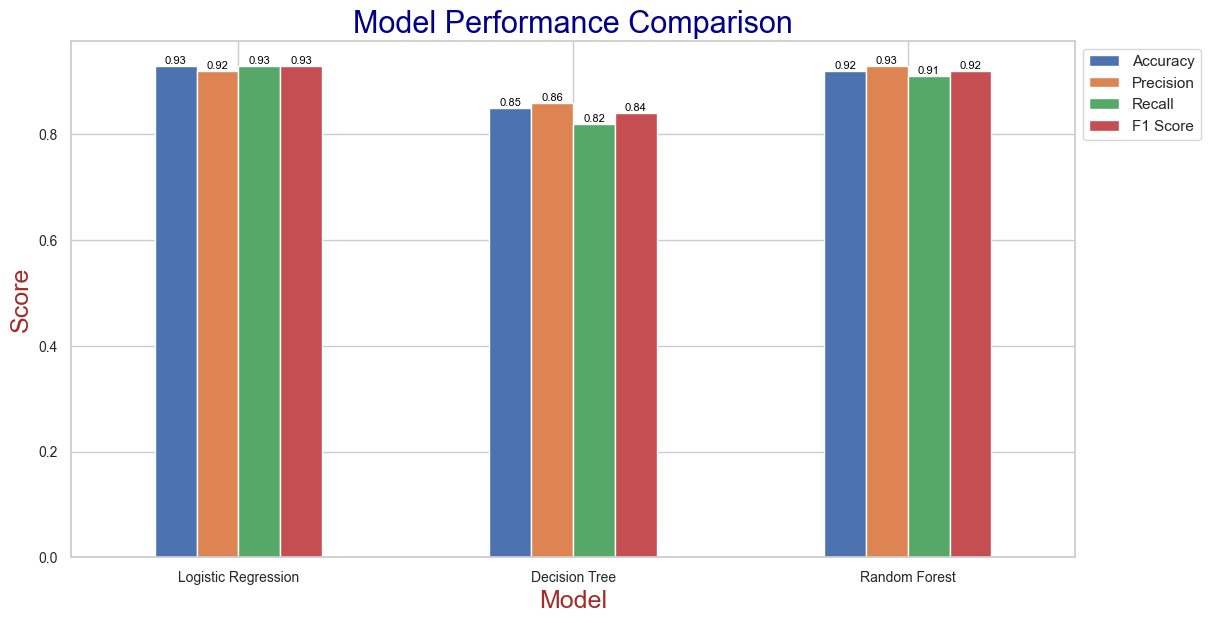

In [62]:
# Compare the performance of the three models
# Create a DataFrame to compare the performance of the three models
performance_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_val, y_val_pred_logistic),
        accuracy_score(y_val, y_val_pred_tree),
        accuracy_score(y_val, y_val_pred_forest)
    ],
    'Precision': [
        precision_score(y_val, y_val_pred_logistic),
        precision_score(y_val, y_val_pred_tree),
        precision_score(y_val, y_val_pred_forest)
    ],
    'Recall': [
        recall_score(y_val, y_val_pred_logistic),
        recall_score(y_val, y_val_pred_tree),
        recall_score(y_val, y_val_pred_forest)
    ],
    'F1 Score': [
        f1_score(y_val, y_val_pred_logistic),
        f1_score(y_val, y_val_pred_tree),
        f1_score(y_val, y_val_pred_forest)
    ]
}
# Convert the performance data to a DataFrame
performance_df = pd.DataFrame(performance_data)
# Display the performance comparison DataFrame with rounded values
performance_df = performance_df.round(2)
# Reset index starting from 1
performance_df.index = range(1, len(performance_df) + 1)
# Make index as blank
performance_df.index.name = None
print("Model Performance Comparison:")
display(performance_df)

# Visualize the performance comparison using a bar plot

# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot to compare the performance of the three models

plt.figure(figsize=(12, 6))
performance_df.set_index('Model').plot(kind='bar', rot=0, figsize=(12, 6))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# show value labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=8, color='black', rotation=0)
plt.title('Model Performance Comparison', fontsize=22, color='darkblue')
plt.xlabel('Model', fontsize=18, color='brown')
plt.ylabel('Score', fontsize=18, color='brown')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10) 
plt.show()

## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.